In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import json
import requests
from functools import reduce

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
# Run this for data source functions
%run yahoo_finance_data.ipynb

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Stored 'one_day_X' (ndarray)
Stored 'one_day_y' (ndarray)
Stored 'five_day_X' (ndarray)
Stored 'five_day_y' (ndarray)
Stored 'ten_day_X' (ndarray)
Stored 'ten_day_y' (ndarray)
Stored 'thirty_day_X' (ndarray)
Stored 'thirty_day_y' (ndarray)
Stored 'rate_forecast_df' (DataFrame)


In [4]:
rate_forecast_df

,Date,Mortgage Backed Securities Adj Close,20+ Yr Treasuries Adj Close,7-10 Yr Treasuries Adj Close,S&P 500 Adj Close,Dow Jones Industrial Average Adj Close,Gold Adj Close,Volatility Index Adj Close,10-Yr Treasury Yield Adj Close,one_day_rate_forecast,five_day_rate_forecast,ten_day_rate_forecast,thirty_day_rate_forecast
0,2007-03-16,62.714951,54.761120,56.177395,100.201828,82.273788,64.620003,16.790001,4.545,4.571,4.613,4.648,4.63
1,2007-03-19,62.714951,54.645290,56.103416,101.409752,83.109802,64.739998,14.590000,4.571,4.547,4.587,4.642,4.642
2,2007-03-20,62.789608,54.675777,56.184113,101.966728,83.476822,65.269997,13.270000,4.547,4.518,4.612,4.664,4.646
3,2007-03-21,62.870441,54.700169,56.264820,103.644829,84.475914,65.820000,12.190000,4.518,4.589,4.62,4.652,4.674
4,2007-03-22,62.783394,54.267429,56.076561,103.565269,84.584709,65.760002,12.930000,4.589,4.613,4.632,4.674,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,2023-12-12,91.508057,94.316132,93.882133,462.225952,365.592468,183.490005,12.070000,4.206,4.033,predict this,predict this,predict this
4213,2023-12-13,92.874001,96.528992,95.278000,468.600098,370.910553,187.630005,12.190000,4.033,3.93,predict this,predict this,predict this
4214,2023-12-14,93.650002,99.040001,96.070000,470.104004,372.497009,188.729996,12.480000,3.930,3.928,predict this,predict this,predict this
4215,2023-12-15,93.339996,99.150002,95.989998,469.329987,372.630005,187.000000,12.280000,3.928,3.96,predict this,predict this,predict this


In [3]:
one_day_X

array([[ 62.71495056,  54.76111984,  56.17739487, ...,  64.62000275,
         16.79000092,   4.54500008],
       [ 62.71495056,  54.64529037,  56.10341644, ...,  64.73999786,
         14.59000015,   4.5710001 ],
       [ 62.789608  ,  54.67577744,  56.18411255, ...,  65.26999664,
         13.27000046,   4.54699993],
       ...,
       [ 92.87400055,  96.5289917 ,  95.27799988, ..., 187.63000488,
         12.18999958,   4.03299999],
       [ 93.65000153,  99.04000092,  96.06999969, ..., 188.72999573,
         12.47999954,   3.93000007],
       [ 93.33999634,  99.15000153,  95.98999786, ..., 187.        ,
         12.27999973,   3.92799997]])

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(one_day_X, one_day_y)

score = model.score(one_day_X, one_day_y)
print(f"R2 Score: {score}")

R2 Score: 0.9963729513122711


In [6]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-8.77761203e-04 -3.42740553e-04  1.65533784e-04  1.32707104e-04
  -4.18874030e-05 -5.42654511e-05 -1.13824979e-04  9.87568216e-01]]
y-axis intercept:  [0.11571443]


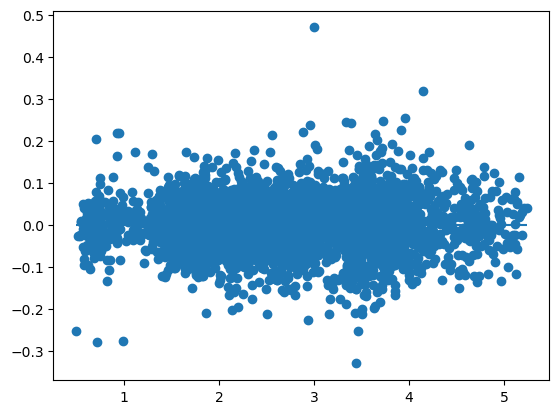

In [7]:
predictions = model.predict(one_day_X)
# Plot Residuals
plt.scatter(predictions, predictions - one_day_y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [8]:
new_data = [[93.245003, 98.794998, 95.894997, 469.739990, 372.660004, 187.339996, 12.320000, 3.932]]

new_prediction = model.predict(new_data)
new_prediction

array([[3.93415828]])